In [2]:
import os
import pickle

import numpy as np, pandas as pd
import scipy
from sklearn.metrics import pairwise_kernels
import metaspace
import re

from sklearn.preprocessing import MultiLabelBinarizer

from pixel_dataframes import create_sim_df

In [3]:
def create_coloc_df(ds_id, fdr = 0.1, database=('HMDB','v4'), only_first_isotope = True, scale_intensity = False, hotspot_clipping = False):
    sm = metaspace.SMInstance()
    ds = sm.dataset(id=ds_id)
    tmp = ds.all_annotation_images(fdr=fdr,
                                   database=database,
                                   only_first_isotope=only_first_isotope,
                                   scale_intensity=scale_intensity,
                                   hotspot_clipping=hotspot_clipping,
                                   offSample = False)
    ion_array = np.array(
        [scipy.signal.medfilt2d(x._images[0], kernel_size=3).flatten() for x in tmp])
    df = pd.DataFrame(pairwise_kernels(ion_array, metric='cosine'),
                      columns = [x.formula + x.adduct + '+' for x in tmp], # + '+' is only a temporary fix
                      index=[x.formula + x.adduct + '+' for x in tmp])     # and of course only works for the positive mode 
    return df

In [4]:
ds_dir = "datasets/theos_recom/mouse_wb_pos"

ds_ids = []
for dataset in os.listdir(ds_dir):
    query = re.search('pixel_df_(.*).pickle', dataset)
    ds_ids.append(query.group(1))

ds_ids

['2017-08-11_07h59m58s', '2017-08-03_15h09m51s', '2017-08-03_15h09m06s']

In [5]:
sm = metaspace.SMInstance()

In [6]:
ds1 = sm.dataset(id = ds_ids[0])
ds2 = sm.dataset(id = ds_ids[1])
ds3 = sm.dataset(id = ds_ids[2])

ds_list = [ds1, ds2, ds3]

In [7]:
print(f'Dataset 1: {ds1.name}, {ds_ids[0]} \n' )
print(f'Dataset 2: {ds2.name}, {ds_ids[1]} \n' )
print(f'Dataset 3: {ds3.name}, {ds_ids[2]} \n' )

Dataset 1: Servier_Ctrl_mouse_wb_lateral_plane_DHB, 2017-08-11_07h59m58s 

Dataset 2: Servier_Ctrl_mouse_wb_lateral_plane_chca, 2017-08-03_15h09m51s 

Dataset 3: Servier_Ctrl_mouse_wb_median_plane_chca, 2017-08-03_15h09m06s 



In [8]:
results1 = ds1.results(database=("HMDB", "v4"), fdr=0.1)
results1 = results1[results1['offSample']==False]
results2 = ds2.results(database=("HMDB", "v4"), fdr=0.1)
results2 = results2[results2['offSample']==False]
results3 = ds3.results(database=("HMDB", "v4"), fdr=0.1)
results3 = results3[results3['offSample']==False]


In [9]:
results = [results1, results2, results3]

for i, df in enumerate(results):
    df['dataset_id'] = ds_ids[i]
    df['dataset_name'] = ds_list[i].name

In [10]:
pos_df = pd.concat(results) # positive mode datasets

In [11]:
pos_df.drop(columns=['mz', 'moc', 'msm', 'rhoSpectral', 'rhoSpatial'], inplace=True) # Those differ between dfs

In [12]:
pos_df

,,ionFormula,ion,fdr,offSample,isotopeImages,colocCoeff,moleculeNames,moleculeIds,intensity,dataset_id,dataset_name
formula,adduct,,,,,,,,,,,
C7H6O4,+Na,C7H6O4Na,C7H6O4+Na+,0.05,False,"[{'mz': 177.0157905096638, 'url': 'https://s3....",None,"[2,4,6-trihydroxybenzaldehyde, Patulin, 2,4-Di...","[HMDB0125090, HMDB0034299, HMDB0029666, HMDB00...",888920832,2017-08-11_07h59m58s,Servier_Ctrl_mouse_wb_lateral_plane_DHB
C8H20NO6P,+K,C8H20NO6PK,C8H20NO6P+K+,0.05,False,"[{'mz': 296.0659429376638, 'url': 'https://s3....",None,[Glycerophosphocholine],[HMDB0000086],1745010688,2017-08-11_07h59m58s,Servier_Ctrl_mouse_wb_lateral_plane_DHB
C10H16N4O3,+H,C10H17N4O3,C10H16N4O3+H+,0.05,False,"[{'mz': 241.12947762166382, 'url': 'https://s3...",None,"[Homocarnosine, Anserine, Balenine]","[HMDB0000745, HMDB0000194, HMDB0005769]",566004288,2017-08-11_07h59m58s,Servier_Ctrl_mouse_wb_lateral_plane_DHB
C12H22O11,+Na,C12H22O11Na,C12H22O11+Na+,0.05,False,"[{'mz': 365.1053933616638, 'url': 'https://s3....",None,"[6-({[3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2...","[HMDB0133305, HMDB0125600, HMDB0060068, HMDB00...",342845344,2017-08-11_07h59m58s,Servier_Ctrl_mouse_wb_lateral_plane_DHB
C4H9N3O2,+K,C4H9N3O2K,C4H9N3O2+K+,0.05,False,"[{'mz': 170.03259563566382, 'url': 'https://s3...",None,"[Beta-Guanidinopropionic acid, Creatine]","[HMDB0013222, HMDB0000064]",104756400,2017-08-11_07h59m58s,Servier_Ctrl_mouse_wb_lateral_plane_DHB
...,...,...,...,...,...,...,...,...,...,...,...,...
C8H20NO6P,+H,C8H21NO6P,C8H20NO6P+H+,0.10,False,"[{'mz': 258.11006106966374, 'url': 'https://s3...",None,[Glycerophosphocholine],[HMDB0000086],2267201536,2017-08-03_15h09m06s,Servier_Ctrl_mouse_wb_median_plane_chca
C35H66O4,+H,C35H67O4,C35H66O4+H+,0.10,False,"[{'mz': 551.5033478016694, 'url': 'https://s3....",None,"[Artemoin D, Artemoin C, Artemoin B, Artemoin A]","[HMDB0033607, HMDB0033606, HMDB0033605, HMDB00...",183476496,2017-08-03_15h09m06s,Servier_Ctrl_mouse_wb_median_plane_chca
C21H36O3,+H,C21H37O3,C21H36O3+H+,0.10,False,"[{'mz': 337.2736822216638, 'url': 'https://s3....",None,"[3,4-Dimethyl-5-pentyl-2-furandecanoic acid, 3...","[HMDB0112067, HMDB0112079, HMDB0112076, HMDB01...",50856900,2017-08-03_15h09m06s,Servier_Ctrl_mouse_wb_median_plane_chca


In [13]:
pos_df[pos_df.offSample == True]


,,ionFormula,ion,fdr,offSample,isotopeImages,colocCoeff,moleculeNames,moleculeIds,intensity,dataset_id,dataset_name
formula,adduct,,,,,,,,,,,


In [14]:
ion2ds_name = {}
ion2ds_id = {}
for i, row in pos_df.iterrows():
    if row.offSample == False:
        ion2ds_name.setdefault(row['ion'], []).append(row['dataset_name'])
        ion2ds_id.setdefault(row['ion'], []).append(row['dataset_id'])
    else: continue

In [15]:
len(ion2ds_id)  # unique ions across the 3 datasets

64

In [16]:
ion_df = pd.DataFrame(ion2ds_name.items(), columns=['ion', 'dataset_name'])
ion_df['dataset_id'] = ion_df['ion'].map(ion2ds_id)

In [17]:
ion_df

,ion,dataset_name,dataset_id
0,C7H6O4+Na+,[Servier_Ctrl_mouse_wb_lateral_plane_DHB],[2017-08-11_07h59m58s]
1,C8H20NO6P+K+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s]"
2,C10H16N4O3+H+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s, 2..."
3,C12H22O11+Na+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s]"
4,C4H9N3O2+K+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s, 2..."
...,...,...,...
59,C10H11NO2+Na+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s]
60,C21H22O5+H+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s]
61,C12H20N2O3+H+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s]
62,C21H36O3+H+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s]


In [18]:
multi_hot = MultiLabelBinarizer()
encoded = multi_hot.fit_transform(ion_df['dataset_name'])

ion_df['encoded'] = list(encoded)
# turning lists into tuples
for i, row in ion_df.iterrows():
    row['encoded'] = tuple(row['encoded'])

list(multi_hot.classes_)

['Servier_Ctrl_mouse_wb_lateral_plane_DHB',
 'Servier_Ctrl_mouse_wb_lateral_plane_chca',
 'Servier_Ctrl_mouse_wb_median_plane_chca']

In [19]:
ion_df = pd.concat([ion_df,pd.get_dummies(ion_df['dataset_name'].apply(pd.Series).stack()).sum(level=0)], axis=1)

/tmp/ipykernel_16292/2369828316.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  ion_df = pd.concat([ion_df,pd.get_dummies(ion_df['dataset_name'].apply(pd.Series).stack()).sum(level=0)], axis=1)


In [20]:
ion_df

,ion,dataset_name,dataset_id,encoded,Servier_Ctrl_mouse_wb_lateral_plane_DHB,Servier_Ctrl_mouse_wb_lateral_plane_chca,Servier_Ctrl_mouse_wb_median_plane_chca
0,C7H6O4+Na+,[Servier_Ctrl_mouse_wb_lateral_plane_DHB],[2017-08-11_07h59m58s],"(1, 0, 0)",1,0,0
1,C8H20NO6P+K+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s]","(1, 1, 0)",1,1,0
2,C10H16N4O3+H+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s, 2...","(1, 1, 1)",1,1,1
3,C12H22O11+Na+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s]","(1, 1, 0)",1,1,0
4,C4H9N3O2+K+,"[Servier_Ctrl_mouse_wb_lateral_plane_DHB, Serv...","[2017-08-11_07h59m58s, 2017-08-03_15h09m51s, 2...","(1, 1, 1)",1,1,1
...,...,...,...,...,...,...,...
59,C10H11NO2+Na+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s],"(0, 0, 1)",0,0,1
60,C21H22O5+H+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s],"(0, 0, 1)",0,0,1
61,C12H20N2O3+H+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s],"(0, 0, 1)",0,0,1
62,C21H36O3+H+,[Servier_Ctrl_mouse_wb_median_plane_chca],[2017-08-03_15h09m06s],"(0, 0, 1)",0,0,1


In [21]:
triple_ions = []; double_ions = []; single_ions = [] # make lists for ions occuring in all 3, in 2 of the 3 and in only a single ds
for i, row in ion_df.iterrows():
    if len(row['dataset_name']) == 3:
        triple_ions.append(row['ion'])
    elif len(row['dataset_name']) == 2:
        double_ions.append(row['ion'])
    elif len(row['dataset_name']) == 1:
        single_ions.append(row['ion'])
assert (len(single_ions) + len(double_ions) + len(triple_ions)) == len(ion_df) # assert for correct # of ions

In [22]:
# Create corresponding dfs
triple_df = ion_df[ion_df['ion'].isin(triple_ions)]
double_df = ion_df[ion_df['ion'].isin(double_ions)]
single_df = ion_df[ion_df['ion'].isin(single_ions)] 

In [23]:
# There are 3 combination possibilities for ions annotated in 2 datasets
median_lateral_dhb = [ds1.name, ds2.name]
median_lateral_chca = [ds1.name, ds3.name]
lateral_lateral = [ds2.name, ds2.name]

In [24]:
# ion lists filtered after their dataset annotation

median_lateraldhb_ions = double_df[
    (double_df['Servier_Ctrl_mouse_wb_median_plane_chca'] == 1) &
    (double_df['Servier_Ctrl_mouse_wb_lateral_plane_DHB'] == 1)].ion.tolist()
median_lateralchca_ions = double_df[
    (double_df['Servier_Ctrl_mouse_wb_median_plane_chca'] == 1) &
    (double_df['Servier_Ctrl_mouse_wb_lateral_plane_chca'] == 1)].ion.tolist()
lateral_lateral_ions = double_df[
    (double_df['Servier_Ctrl_mouse_wb_lateral_plane_DHB'] == 1) &
    (double_df['Servier_Ctrl_mouse_wb_lateral_plane_chca'] == 1)].ion.tolist()


median_lateraldhb_ions, median_lateralchca_ions, lateral_lateral_ions

(['C37H66O4+H+', 'C29H47NO4+Na+', 'C37H68O4+H+', 'C35H66O4+H+'],
 ['C10H7NO3+Na+',
  'C10H7NO3+K+',
  'C9H14N4O3+K+',
  'C28H33O14+Na+',
  'C10H7NO3+H+',
  'C10H11NO+Na+',
  'C9H20N2O2+H+',
  'C7H15NO3+K+',
  'C26H30O12+Na+',
  'C8H17NO2+H+',
  'C10H19NO4+H+',
  'C15H22N2O4+H+',
  'C26H52NO6P+H+'],
 ['C8H20NO6P+K+',
  'C12H22O11+Na+',
  'C8H20NO6P+Na+',
  'C12H22O11+K+',
  'C15H18O10+Na+',
  'C13H17NO3+Na+',
  'C6H12O6+K+',
  'C23H45NO4+H+',
  'C25H49NO4+H+',
  'C25H47NO4+H+'])

In [25]:
# create coloc for the ions annotated in every ds first 
co_df1 = create_coloc_df(ds_ids[0])
co_df2 = create_coloc_df(ds_ids[1])
co_df3 = create_coloc_df(ds_ids[2])

100%|████████████████████████████████████████| 34/34 [00:00<00:00, 118.29it/s]


In [26]:
co_df1

,C7H6O4+Na+,C8H20NO6P+K+,C10H16N4O3+H+,C12H22O11+Na+,C4H9N3O2+K+,C10H15N5O10P2+H+,C10H14N5O7P+H+,C8H20NO6P+H+,C8H20NO6P+Na+,C12H22O11+K+,...,C25H47NO4+H+,C11H21NO4+H+,C9H15N3O2+H+,C26H50NO7P+H+,C10H16N5O13P3+H+,C35H66O4+H+,C11H20N2O3+H+,C11H8O5+H+,C29H40N8O5+H+,C35H64O4+H+
C7H6O4+Na+,0.999994,0.317942,0.260938,0.169995,0.432016,0.442504,0.537124,0.359425,0.439472,0.147801,...,0.304253,0.480334,0.318582,0.187795,0.318048,0.202509,0.430444,0.809693,0.111989,0.210297
C8H20NO6P+K+,0.317942,1.000003,0.035087,0.061674,0.132234,0.194842,0.500691,0.968268,0.940347,0.064361,...,0.051789,0.460444,0.761953,0.311352,0.074215,0.061109,0.115257,0.225203,0.072559,0.067985
C10H16N4O3+H+,0.260938,0.035087,1.000001,0.005143,0.672034,0.628199,0.314898,0.035537,0.026794,0.004557,...,0.090839,0.295354,0.089337,0.039927,0.859899,0.115717,0.614783,0.495681,0.003548,0.115805
C12H22O11+Na+,0.169995,0.061674,0.005143,1.000000,0.012607,0.011503,0.025895,0.110742,0.074624,0.986846,...,0.001779,0.052428,0.020969,0.140943,0.001518,0.000706,0.206076,0.084318,0.622341,0.000640
C4H9N3O2+K+,0.432016,0.132234,0.672034,0.012607,1.000003,0.819862,0.592267,0.127875,0.109119,0.011988,...,0.125286,0.573790,0.194496,0.087188,0.698970,0.136853,0.908966,0.484594,0.010210,0.141221
C10H15N5O10P2+H+,0.442504,0.194842,0.628199,0.011503,0.819862,1.000000,0.769374,0.195622,0.152458,0.011168,...,0.170579,0.559605,0.252251,0.153374,0.817595,0.239358,0.786168,0.604913,0.011894,0.270657
C10H14N5O7P+H+,0.537124,0.500691,0.314898,0.025895,0.592267,0.769374,0.999999,0.507234,0.422540,0.027344,...,0.189786,0.694322,0.502832,0.369315,0.479172,0.325660,0.557081,0.591918,0.040313,0.347084
C8H20NO6P+H+,0.359425,0.968268,0.035537,0.110742,0.127875,0.195622,0.507234,1.000005,0.928094,0.110071,...,0.060071,0.507226,0.720641,0.381389,0.070802,0.094986,0.124895,0.262127,0.129952,0.105381
C8H20NO6P+Na+,0.439472,0.940347,0.026794,0.074624,0.109119,0.152458,0.422540,0.928094,1.000001,0.067991,...,0.096023,0.419201,0.723870,0.219832,0.058171,0.072847,0.105251,0.280686,0.066188,0.077622
C12H22O11+K+,0.147801,0.064361,0.004557,0.986846,0.011988,0.011168,0.027344,0.110071,0.067991,1.000001,...,0.000124,0.057284,0.020184,0.132397,0.001432,0.000254,0.205412,0.071078,0.638038,0.000230


In [33]:
co_df1.index.isin(lateral_lateral_ions)

array([False,  True, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False])

In [34]:
# We want to select ions that are 
# - annotated in two datasets 
# - have a large coloc with ions annotated in all datasets

# co_df1 corresponds to lateral_dhb
df1 = co_df1.loc[list(co_df1.index.isin(triple_ions)), lateral_lateral_ions ]
df1


,C8H20NO6P+K+,C12H22O11+Na+,C8H20NO6P+Na+,C12H22O11+K+,C15H18O10+Na+,C13H17NO3+Na+,C6H12O6+K+,C23H45NO4+H+,C25H49NO4+H+,C25H47NO4+H+
C10H16N4O3+H+,0.035087,0.005143,0.026794,0.004557,0.004557,0.035537,0.016063,0.187671,0.118178,0.090839
C4H9N3O2+K+,0.132234,0.012607,0.109119,0.011988,0.011988,0.127875,0.099591,0.202763,0.150359,0.125286
C8H20NO6P+H+,0.968268,0.110742,0.928094,0.110071,0.110071,1.000005,0.292215,0.089828,0.083225,0.060071
C15H22N6O5S+H+,0.294366,0.090203,0.244760,0.079996,0.079996,0.299667,0.191310,0.206529,0.165191,0.134782
C24H50NO7P+H+,0.334378,0.307101,0.300760,0.280008,0.280008,0.410196,0.202956,0.305832,0.239770,0.205646
C9H17NO4+H+,0.339634,0.029690,0.363415,0.025687,0.025687,0.362022,0.254204,0.206933,0.179649,0.130976
C7H15NO3+H+,0.522181,0.044345,0.556114,0.038971,0.038971,0.551176,0.380285,0.192653,0.181450,0.129792
C22H22O7+H+,0.282837,0.096031,0.233287,0.085111,0.085111,0.286279,0.198260,0.132348,0.106513,0.073959
C11H21NO4+H+,0.460444,0.052428,0.419201,0.057284,0.057284,0.507226,0.374974,0.142557,0.138872,0.089041
C26H50NO7P+H+,0.311352,0.140943,0.219832,0.132397,0.132397,0.381389,0.127311,0.048381,0.044326,0.035189


In [36]:
# first find the max
sort1 = df1.mean().sort_values(ascending=False).index.tolist()
# pick the 3 max values 
top1 = sort1[:3]

In [37]:
# now the min ions
bot1 = [sort1[-1]]
bot1

['C15H18O10+Na+']

In [38]:
# Now with the other dataset
df2 = co_df1.loc[co_df1.index.isin(triple_ions), median_lateraldhb_ions]
df2

,C37H66O4+H+,C29H47NO4+Na+,C37H68O4+H+,C35H66O4+H+
C10H16N4O3+H+,0.113410,0.289011,0.135489,0.115717
C4H9N3O2+K+,0.127969,0.385977,0.166482,0.136853
C8H20NO6P+H+,0.102044,0.410196,0.127769,0.094986
C15H22N6O5S+H+,0.171233,0.556087,0.218920,0.177033
C24H50NO7P+H+,0.428117,1.000002,0.459456,0.409017
C9H17NO4+H+,0.216965,0.463196,0.289524,0.209678
C7H15NO3+H+,0.278554,0.474872,0.348496,0.267981
C22H22O7+H+,0.066984,0.451454,0.098610,0.075427
C11H21NO4+H+,0.196410,0.522329,0.267448,0.185073
C26H50NO7P+H+,0.195819,0.568772,0.197742,0.174669


In [39]:
print(df2.mean().sort_values(ascending=False))
sort_ions = df2.mean().sort_values(ascending=False).index.tolist()
# Only take the top 1, as it has coloc of 1 with C24H50NO7P+H+
top2 = [sort_ions[0]]
bot2 = [sort_ions[-1]]

C29H47NO4+Na+    0.503465
C37H68O4+H+      0.223805
C37H66O4+H+      0.183492
C35H66O4+H+      0.179320
dtype: float32


In [43]:
# Now the next coloc_df, should be lateral_chca
df3 = co_df2.loc[co_df2.index.isin(triple_ions), median_lateralchca_ions]
print(df3.mean())
# add C35H6604+H+ to the bottom ions
sort3 = df3.mean().sort_values(ascending=False).index.tolist()
bot3 = [sort3[-2]]
print(bot3)


C10H7NO3+Na+     0.318567
C10H7NO3+K+      0.654151
C9H14N4O3+K+     0.495038
C28H33O14+Na+    0.121541
C10H7NO3+H+      0.496536
C10H11NO+Na+     0.587684
C9H20N2O2+H+     0.577108
C7H15NO3+K+      0.627081
C26H30O12+Na+    0.108552
C8H17NO2+H+      0.671019
C10H19NO4+H+     0.396235
C15H22N2O4+H+    0.082527
C26H52NO6P+H+    0.463324
dtype: float32
['C26H30O12+Na+']


In [44]:
# Now DHB with chca lateral
df4 = co_df2.loc[co_df2.index.isin(triple_ions), lateral_lateral_ions]
print(df4.mean().sort_values(ascending=False))
# The values are not high on average but show individual coloc of ~ 1 (sometimes different adduct) 
# We choose to take the top and bottom 3
sort4 = df4.mean().sort_values(ascending=False).index.tolist()
top4 = sort4[:3] 
bot4 = sort4[-3:]
print(top4, bot4)

C13H17NO3+Na+    0.320093
C8H20NO6P+K+     0.313740
C8H20NO6P+Na+    0.225805
C12H22O11+Na+    0.100124
C6H12O6+K+       0.095685
C12H22O11+K+     0.090917
C15H18O10+Na+    0.090917
C25H47NO4+H+     0.040844
C25H49NO4+H+     0.039612
C23H45NO4+H+     0.028735
dtype: float32
['C13H17NO3+Na+', 'C8H20NO6P+K+', 'C8H20NO6P+Na+'] ['C25H47NO4+H+', 'C25H49NO4+H+', 'C23H45NO4+H+']


In [45]:
# Now the next coloc df, corresponding to median_chca
df5 = co_df3.loc[co_df3.index.isin(triple_ions), median_lateralchca_ions]
means5 = df5.mean().sort_values(ascending=False)
print(means5)
top5 = means5.index.tolist()[:3]
bot5 = means5.index.tolist()[-2:]
print(top5, bot5)
print(set(top1).intersection(set(top5)))

C8H17NO2+H+      0.628636
C7H15NO3+K+      0.575954
C10H7NO3+K+      0.557129
C10H11NO+Na+     0.532319
C10H7NO3+H+      0.522310
C26H52NO6P+H+    0.414948
C9H20N2O2+H+     0.370493
C9H14N4O3+K+     0.369848
C10H7NO3+Na+     0.349906
C10H19NO4+H+     0.305677
C15H22N2O4+H+    0.100068
C28H33O14+Na+    0.092839
C26H30O12+Na+    0.077086
dtype: float32
['C8H17NO2+H+', 'C7H15NO3+K+', 'C10H7NO3+K+'] ['C28H33O14+Na+', 'C26H30O12+Na+']
set()


In [46]:
df6 = co_df3.loc[co_df3.index.isin(triple_ions), median_lateraldhb_ions]
means6 = df6.mean().sort_values(ascending=False)
print('means \n', means6)
print('max \n', df6.max().sort_values(ascending=False))

top6 = means6.index.tolist()[:3]
bot6 = means6.index.tolist()[-3:]

print('top', top6, ' bottom ', bot6)

means 
 C29H47NO4+Na+    0.441349
C37H66O4+H+      0.412682
C37H68O4+H+      0.283625
C35H66O4+H+      0.245220
dtype: float32
max 
 C29H47NO4+Na+    0.999953
C37H66O4+H+      0.613050
C37H68O4+H+      0.490723
C35H66O4+H+      0.380783
dtype: float32
top ['C29H47NO4+Na+', 'C37H66O4+H+', 'C37H68O4+H+']  bottom  ['C37H66O4+H+', 'C37H68O4+H+', 'C35H66O4+H+']


In [47]:
# Now build the train_ions from all top and bottom ions
train_top = top1 + top2 + top4 + top5 + top6
train_top = list(set(train_top)) # get rid of duplicates
print(train_top)
train_bot = bot1 + bot2 + bot3 + bot4 + bot5 + bot6
train_bot = list(set(train_bot))
print(train_bot)

['C10H7NO3+K+', 'C7H15NO3+K+', 'C37H66O4+H+', 'C8H20NO6P+Na+', 'C37H68O4+H+', 'C13H17NO3+Na+', 'C8H20NO6P+K+', 'C29H47NO4+Na+', 'C8H17NO2+H+']
['C23H45NO4+H+', 'C28H33O14+Na+', 'C37H66O4+H+', 'C25H47NO4+H+', 'C37H68O4+H+', 'C26H30O12+Na+', 'C25H49NO4+H+', 'C15H18O10+Na+', 'C35H66O4+H+']


In [48]:
train_ions = triple_ions + train_top + train_bot 
train_ions = list(set(train_ions))
print(train_ions)
print(len(train_ions))

['C11H21NO4+H+', 'C23H45NO4+H+', 'C8H20NO6P+Na+', 'C11H20N2O3+H+', 'C4H9N3O2+K+', 'C37H66O4+H+', 'C25H47NO4+H+', 'C37H68O4+H+', 'C24H50NO7P+H+', 'C8H20NO6P+H+', 'C26H50NO7P+H+', 'C35H66O4+H+', 'C9H17NO4+H+', 'C25H49NO4+H+', 'C22H22O7+H+', 'C8H20NO6P+K+', 'C29H47NO4+Na+', 'C7H15NO3+H+', 'C15H22N6O5S+H+', 'C10H7NO3+K+', 'C7H15NO3+K+', 'C10H16N4O3+H+', 'C28H33O14+Na+', 'C13H17NO3+Na+', 'C26H30O12+Na+', 'C15H18O10+Na+', 'C8H17NO2+H+']
27


In [49]:
# add some ions that occur only in single datasets

sdf1 = co_df1.loc[co_df1.index.isin(triple_ions), co_df1.index.isin(single_ions)]
mean_s1 = sdf1.mean().sort_values(ascending=False)
print(mean_s1)
single_top1 = [mean_s1.index.tolist()[0]]

C10H14N5O7P+H+      0.584502
C10H15N5O10P2+H+    0.583670
C10H16N5O13P3+H+    0.463093
C11H8O5+H+          0.439085
C7H6O4+Na+          0.436579
C13H8F2O3+Na+       0.427742
C7H6O4+H+           0.424799
C15H10O6+H+         0.405010
C9H14N4O3+H+        0.350607
C14H10O6+H+         0.335402
C9H15N3O2+H+        0.321784
C35H64O4+H+         0.191162
C29H40N8O5+H+       0.090317
C13H13N3+H+         0.065000
dtype: float32


In [50]:
sdf2 = co_df2.loc[co_df2.index.isin(triple_ions), co_df2.index.isin(single_ions)]
mean_s2 = sdf2.mean().sort_values(ascending=False)
print(mean_s2)
max_s2 = sdf2.max().sort_values(ascending=False)
print(max_s2)
single_top2 = max_s2.index.tolist()[:3]
single_bot2 = [mean_s2.index.tolist()[-1]]
sdf2

C11H21NO5+H+     0.618764
C18H24O3+Na+     0.608751
C15H28O4+K+      0.608175
C15H16O9S+K+     0.583787
C24H50NO7P+K+    0.577944
C18H32O16+K+     0.098098
dtype: float32
C11H21NO5+H+     0.931972
C24H50NO7P+K+    0.839709
C15H16O9S+K+     0.781635
C15H28O4+K+      0.733941
C18H24O3+Na+     0.733689
C18H32O16+K+     0.462316
dtype: float32


,C24H50NO7P+K+,C18H32O16+K+,C15H28O4+K+,C15H16O9S+K+,C18H24O3+Na+,C11H21NO5+H+
C4H9N3O2+K+,0.566335,0.002086,0.719716,0.781635,0.719106,0.732712
C9H17NO4+H+,0.614087,0.003850,0.733941,0.691505,0.733689,0.919186
C8H20NO6P+H+,0.551725,0.101804,0.460170,0.267204,0.460937,0.229982
C11H20N2O3+H+,0.527933,0.046472,0.659233,0.748921,0.660220,0.740087
C7H15NO3+H+,0.631112,0.007379,0.667269,0.537119,0.666185,0.766940
C10H16N4O3+H+,0.396393,0.000977,0.472437,0.703032,0.474238,0.508937
C11H21NO4+H+,0.616212,0.016321,0.666218,0.598820,0.666515,0.931972
C22H22O7+H+,0.544815,0.032497,0.720675,0.702685,0.722055,0.697528
C26H50NO7P+H+,0.522111,0.462316,0.226467,0.121365,0.226886,0.102522
C15H22N6O5S+H+,0.546948,0.032252,0.723716,0.703972,0.725021,0.699504


In [51]:
sdf3 = co_df3.loc[co_df3.index.isin(triple_ions), co_df3.index.isin(single_ions)]
mean_s3 = sdf3.mean().sort_values(ascending=False)
print(mean_s3)
max_s3 = sdf3.max().sort_values(ascending=False)
print(max_s3)
single_top3 = max_s3.index.tolist()[:3]
# singe_bot3 = [mean_s3.index.tolist()[-1]]
sdf3

C10H11NO2+Na+    0.575954
C12H20N2O3+H+    0.459037
C24H32O5+Na+     0.411690
C21H22O5+H+      0.408417
C26H52NO7P+H+    0.388740
C21H36O3+H+      0.174636
dtype: float32
C10H11NO2+Na+    0.885728
C26H52NO7P+H+    0.749084
C21H22O5+H+      0.747479
C12H20N2O3+H+    0.688707
C21H36O3+H+      0.685673
C24H32O5+Na+     0.584781
dtype: float32


,C24H32O5+Na+,C10H11NO2+Na+,C21H22O5+H+,C12H20N2O3+H+,C21H36O3+H+,C26H52NO7P+H+
C9H17NO4+H+,0.392336,0.697835,0.420510,0.531892,0.073709,0.237641
C24H50NO7P+H+,0.336100,0.419271,0.183165,0.319966,0.284257,0.749084
C4H9N3O2+K+,0.578431,0.662135,0.747479,0.606551,0.058198,0.235672
C7H15NO3+H+,0.429552,0.885728,0.285530,0.527005,0.189105,0.551256
C11H20N2O3+H+,0.478481,0.688264,0.601366,0.688707,0.026199,0.186423
C11H21NO4+H+,0.460790,0.817279,0.373460,0.523699,0.179611,0.426057
C10H16N4O3+H+,0.262681,0.297289,0.562432,0.345817,0.005607,0.172344
C22H22O7+H+,0.582910,0.620513,0.585427,0.570610,0.076174,0.247938
C15H22N6O5S+H+,0.584781,0.623732,0.586806,0.572030,0.076845,0.253212
C26H50NO7P+H+,0.258493,0.290574,0.128404,0.186978,0.685673,0.747074


In [52]:
top_single = single_top1 + single_top2 + single_top3
bot_single = single_bot2

In [53]:
train_ions = train_ions + top_single + bot_single

In [54]:
len(train_ions)

35

In [55]:
co_df = pd.concat([co_df1, co_df2, co_df3])
co_df
all_ions = co_df.columns.tolist()


In [56]:
# train_ion_df 
# co_df 
# for co_df in [co_df1, co_df2, co_df3]:
#     for ion in train_ions:
#         train_ion_df[ion] = co_df[ion]

In [57]:
train_df1 = co_df1.loc[co_df1.index.isin(train_ions), co_df1.columns.isin(train_ions)]
train_df2 = co_df2.loc[co_df2.index.isin(train_ions), co_df2.columns.isin(train_ions)]
train_df3 = co_df3.loc[co_df3.index.isin(train_ions), co_df3.columns.isin(train_ions)]

In [58]:
train_df = pd.concat([train_df1, train_df2, train_df3])

In [65]:
test_df = pd.concat([co_df1, co_df2, co_df3])

In [68]:
test_df
by_row_index = train_df.groupby(train_df.index)
mean_coloc_df = by_row_index.mean()
mean_coloc_df = mean_coloc_df[mean_coloc_df.index]
mean_coloc_df

,C10H11NO2+Na+,C10H14N5O7P+H+,C10H16N4O3+H+,C10H7NO3+K+,C11H20N2O3+H+,C11H21NO4+H+,C11H21NO5+H+,C13H17NO3+Na+,C15H16O9S+K+,C15H18O10+Na+,...,C37H66O4+H+,C37H68O4+H+,C4H9N3O2+K+,C7H15NO3+H+,C7H15NO3+K+,C8H17NO2+H+,C8H20NO6P+H+,C8H20NO6P+K+,C8H20NO6P+Na+,C9H17NO4+H+
C10H11NO2+Na+,1.000000,NaN,0.297289,0.731381,0.688264,0.817279,NaN,NaN,NaN,NaN,...,0.585529,0.482054,0.662135,0.885728,1.000000,0.849655,0.332871,NaN,NaN,0.697835
C10H14N5O7P+H+,NaN,0.999999,0.314898,NaN,0.557081,0.694322,NaN,0.507234,NaN,0.027344,...,0.330505,0.384831,0.592267,0.668243,NaN,NaN,0.507234,0.500691,0.422540,0.663319
C10H16N4O3+H+,0.297289,0.314898,0.999995,0.484511,0.637150,0.353370,0.508937,0.045004,0.703032,0.002879,...,0.148725,0.123780,0.656495,0.298933,0.357205,0.423200,0.099005,0.047690,0.019618,0.427373
C10H7NO3+K+,0.731381,NaN,0.484511,1.000008,0.661273,0.676132,0.670273,0.455096,0.818669,0.116460,...,0.557470,0.545709,0.738039,0.673715,0.772867,0.753215,0.394237,0.493593,0.384357,0.656351
C11H20N2O3+H+,0.688264,0.557081,0.637150,0.661273,1.000003,0.597122,0.740087,0.109182,0.748921,0.125373,...,0.205264,0.165264,0.884005,0.536992,0.688472,0.749961,0.094322,0.113416,0.068928,0.702174
C11H21NO4+H+,0.817279,0.694322,0.353370,0.676132,0.597122,1.000001,0.931972,0.428363,0.598820,0.036425,...,0.380623,0.352591,0.629966,0.828207,0.812388,0.832611,0.396943,0.407169,0.319741,0.843477
C11H21NO5+H+,NaN,NaN,0.508937,0.670273,0.740087,0.931972,1.000001,0.229982,0.593261,0.003304,...,NaN,NaN,0.732712,0.766940,0.772380,0.832321,0.229982,0.236780,0.130583,0.919186
C13H17NO3+Na+,NaN,0.507234,0.045004,0.455096,0.109182,0.428363,0.229982,1.000005,0.267204,0.102241,...,0.102044,0.127769,0.120234,0.505240,0.411477,0.307271,1.000005,0.954442,0.901847,0.302768
C15H16O9S+K+,NaN,NaN,0.703032,0.818669,0.748921,0.598820,0.593261,0.267204,1.000007,0.051734,...,NaN,NaN,0.781635,0.537119,0.638170,0.635927,0.267204,0.304343,0.226276,0.691505
C15H18O10+Na+,NaN,0.027344,0.002879,0.116460,0.125373,0.036425,0.003304,0.102241,0.051734,1.000000,...,0.000717,0.000489,0.007110,0.023276,0.005783,0.042650,0.102241,0.049205,0.050847,0.014769


In [59]:
train_df

,C8H20NO6P+K+,C10H16N4O3+H+,C4H9N3O2+K+,C10H14N5O7P+H+,C8H20NO6P+H+,C8H20NO6P+Na+,C15H18O10+Na+,C15H22N6O5S+H+,C24H50NO7P+H+,C37H66O4+H+,...,C24H50NO7P+K+,C18H32O16+K+,C7H15NO3+K+,C15H16O9S+K+,C26H30O12+Na+,C8H17NO2+H+,C11H21NO5+H+,C10H11NO2+Na+,C21H22O5+H+,C26H52NO7P+H+
C8H20NO6P+K+,1.000003,0.035087,0.132234,0.500691,0.968268,0.940347,0.064361,0.294366,0.334378,0.062990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C10H16N4O3+H+,0.035087,1.000001,0.672034,0.314898,0.035537,0.026794,0.004557,0.584193,0.289011,0.113410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C4H9N3O2+K+,0.132234,0.672034,1.000003,0.592267,0.127875,0.109119,0.011988,0.839375,0.385977,0.127969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C10H14N5O7P+H+,0.500691,0.314898,0.592267,0.999999,0.507234,0.422540,0.027344,0.739745,0.684509,0.330505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C8H20NO6P+H+,0.968268,0.035537,0.127875,0.507234,1.000005,0.928094,0.110071,0.299667,0.410196,0.102044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C26H50NO7P+H+,NaN,0.105737,0.212830,NaN,0.309431,NaN,NaN,0.212533,0.585788,0.568034,...,NaN,NaN,0.290574,NaN,0.057591,0.258656,NaN,0.290574,0.128404,0.747074
C8H20NO6P+H+,NaN,0.207006,0.187287,NaN,1.000030,NaN,NaN,0.098103,0.469643,0.339063,...,NaN,NaN,0.332871,NaN,0.053927,0.392084,NaN,0.332871,0.018013,0.469443
C35H66O4+H+,NaN,0.085304,0.265414,NaN,0.141535,NaN,NaN,0.311836,0.236768,0.324328,...,NaN,NaN,0.413050,NaN,0.239618,0.383971,NaN,0.413050,0.113097,0.248659
C26H52NO7P+H+,NaN,0.172344,0.235672,NaN,0.469443,NaN,NaN,0.253212,0.749084,0.585766,...,NaN,NaN,0.422109,NaN,0.085129,0.336935,NaN,0.422109,0.112715,1.000043


In [60]:
#save the train ions
with open('train_ions.pickle', 'wb') as f:
    pickle.dump(train_ions, f)

In [63]:
top = top_single + train_top
bot = bot_single + train_bot

In [64]:
# save ions
with open('top_ions.pickle', 'wb') as t:
    pickle.dump(top, t)
with open('bot_ions.pickle', 'wb') as b:
    pickle.dump(bot, b)
with open('triple_ions.pickle', 'wb') as triple:
    pickle.dump(triple_ions, triple)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


vec_file = "RW_output/vectors_TF_RW_validation_w5_rw.tsv"
meta_file = "RW_output/metadata_TF_RW_validation_w5_rw.tsv"

iv = pd.read_csv(vec_file, sep = '\t', header= None)           # read ion vectors and their labels
vec_names = pd.read_csv(meta_file, sep = '\t', header = None)

idx2ion = vec_names.to_dict()[0]
iv.index = iv.index.map(idx2ion)


In [ ]:
cos_df = pd.DataFrame(cosine_similarity(iv))
cos_df.index = cos_df.index.map(idx2ion)
cos_df.columns = cos_df.columns.map(idx2ion)

cos_df.drop(columns=['C37H68O4+H+'], inplace=True)
cos_df.drop(index=['C37H68O4+H+'], inplace=True)

In [ ]:
# first, save the train_df
train_df.to_csv('train_ions.csv')
# create an average coloc df
by_row_index = train_df.groupby(train_df.index)
mean_coloc_df = by_row_index.mean()
mean_coloc_df = mean_coloc_df[mean_coloc_df.index]

In [ ]:
pd.read_csv("train_ions.csv", index_col=0)

,C10H7NO3+K+,C9H17NO4+H+,C24H50NO7P+H+,C4H9N3O2+K+,C7H15NO3+H+,C29H47NO4+Na+,C7H15NO3+K+,C11H20N2O3+H+,C10H11NO2+Na+,C26H30O12+Na+,...,C9H14N4O3+H+,C13H17NO3+Na+,C13H13N3+H+,C23H45NO4+H+,C25H49NO4+H+,C25H47NO4+H+,C10H16N5O13P3+H+,C24H50NO7P+K+,C15H16O9S+K+,C11H21NO5+H+
C10H7NO3+K+,1.000007,0.520851,0.610901,0.687084,0.643090,0.610901,0.731381,0.590768,0.731381,0.249796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C9H17NO4+H+,0.520851,1.000014,0.275793,0.693436,0.793039,0.275793,0.697835,0.554495,0.697835,0.128252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C24H50NO7P+H+,0.610901,0.275793,0.999953,0.320979,0.504798,0.999953,0.419271,0.279699,0.419271,0.082574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C4H9N3O2+K+,0.687084,0.693436,0.320979,1.000000,0.562247,0.320979,0.662135,0.805833,0.662135,0.026554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C7H15NO3+H+,0.643090,0.793039,0.504798,0.562247,0.999996,0.504798,0.885728,0.523753,0.885728,0.176286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C25H47NO4+H+,0.090368,0.050207,0.048435,0.040748,0.055735,NaN,0.051253,0.038428,NaN,0.001437,...,NaN,0.047314,NaN,0.925523,0.900728,1.000002,NaN,0.055408,0.124961,0.048046
C24H50NO7P+H+,0.678003,0.534442,1.000009,0.490700,0.546062,NaN,0.566592,0.484564,NaN,0.209551,...,NaN,0.494967,NaN,0.041204,0.039981,0.048435,NaN,0.839709,0.565400,0.477030
C15H22N2O4+H+,0.165387,0.004181,0.112599,0.001684,0.005428,NaN,0.003842,0.013624,NaN,0.000000,...,NaN,0.055266,NaN,0.000000,0.000015,0.000000,NaN,0.048993,0.087458,0.013893
C25H49NO4+H+,0.079201,0.052968,0.039981,0.038407,0.059991,NaN,0.051865,0.038348,NaN,0.002003,...,NaN,0.040517,NaN,0.934583,1.000002,0.900728,NaN,0.042099,0.107665,0.052582


In [ ]:
coord_dict = {(ion1, ion2): (cos_df.loc[ion1,ion2], mean_coloc_df.loc[ion1, ion2]) for ion1 in cos_df.index for ion2 in mean_coloc_df.index}

Text(0.5, 0, 'Cosine distance in embedded space')

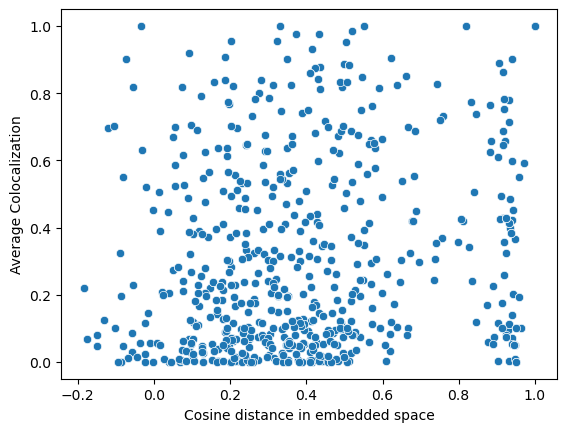

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

l = np.array(list(coord_dict.values()))
sns.scatterplot(x = l[:,0], y= l[:,1])
plt.ylabel('Average Colocalization')
plt.xlabel('Cosine distance in embedded space')

In [ ]:
cos_df

,C15H22N2O4+H+,C8H20NO6P+H+,C29H47NO4+Na+,C25H47NO4+H+,C23H45NO4+H+,C10H11NO2+Na+,C37H66O4+H+,C26H30O12+Na+,C7H15NO3+H+,C25H49NO4+H+,...,C8H20NO6P+Na+,C10H16N5O13P3+H+,C13H17NO3+Na+,C8H20NO6P+K+,C12H22O11+K+,C12H22O11+Na+,C9H14N4O3+H+,C24H50NO7P+K+,C11H21NO5+H+,C15H16O9S+K+
C15H22N2O4+H+,1.000000,-0.057915,0.129413,0.068836,0.040391,0.103402,0.071043,-0.002200,0.026098,0.199376,...,0.082996,0.099416,0.008769,0.103360,0.114925,0.122239,0.096296,0.015836,-0.045852,-0.058169
C8H20NO6P+H+,-0.057915,1.000000,0.427531,0.190923,0.239403,0.240590,-0.183879,0.163213,0.466438,0.208577,...,-0.073909,0.285814,-0.034724,0.201367,0.192927,0.344239,0.339109,-0.080273,0.116241,0.096258
C29H47NO4+Na+,0.129413,0.427531,1.000000,0.599637,0.737573,0.811079,0.090533,0.618665,0.598788,0.836064,...,0.196306,0.395835,0.181345,0.315029,0.303752,0.583725,0.612137,0.060670,-0.008868,0.012067
C25H47NO4+H+,0.068836,0.190923,0.599637,1.000000,0.435828,0.506454,0.117512,0.903287,0.244792,0.421718,...,0.452333,-0.016942,0.444400,-0.082531,-0.086560,0.351238,0.370557,0.353970,-0.150289,-0.130377
C23H45NO4+H+,0.040391,0.239403,0.737573,0.435828,1.000000,0.856450,0.020854,0.452663,0.491213,0.623487,...,0.245636,0.321262,0.206122,0.291317,0.260376,0.434055,0.479836,0.124884,0.124909,0.147927
C10H11NO2+Na+,0.103402,0.240590,0.811079,0.506454,0.856450,1.000000,0.055303,0.548235,0.498636,0.675184,...,0.285650,0.307616,0.225163,0.267461,0.253381,0.498529,0.540984,0.121073,0.049073,0.090760
C37H66O4+H+,0.071043,-0.183879,0.090533,0.117512,0.020854,0.055303,1.000000,0.179799,0.035989,0.213227,...,0.203373,0.023459,0.235063,0.075687,0.043697,-0.024390,-0.024358,0.225497,0.147459,0.181988
C26H30O12+Na+,-0.002200,0.163213,0.618665,0.903287,0.452663,0.548235,0.179799,1.000000,0.340865,0.441819,...,0.410920,-0.039449,0.407844,-0.089665,-0.095290,0.255483,0.259016,0.314080,-0.174686,-0.149478
C7H15NO3+H+,0.026098,0.466438,0.598788,0.244792,0.491213,0.498636,0.035989,0.340865,1.000000,0.412139,...,-0.001792,0.428054,0.012962,0.381925,0.372447,0.231350,0.229488,-0.031263,0.196802,0.225843
C25H49NO4+H+,0.199376,0.208577,0.836064,0.421718,0.623487,0.675184,0.213227,0.441819,0.412139,1.000000,...,0.233343,0.415723,0.235229,0.363565,0.349501,0.507709,0.505812,0.126649,0.097955,0.111555


In [ ]:
vec_file  = "RW_output/vectors_TF_RW_validation_w1moreions_rw.tsv"
meta_file = "RW_output/metadata_TF_RW_validation_w1moreions_rw.tsv"
# processing i2v embeddings
iv = pd.read_csv(vec_file, sep = '\t', header= None)   # read ion vectors and their labels
vec_names = pd.read_csv(meta_file, sep = '\t', header = None)

idx2ion = vec_names.to_dict()[0]
iv.index = iv.index.map(idx2ion)

cos_df = pd.DataFrame(cosine_similarity(iv))
cos_df.index = cos_df.index.map(idx2ion)
cos_df.columns = cos_df.columns.map(idx2ion)

cos_df.drop(columns=['C37H68O4+H+'], inplace=True)
cos_df.drop(index=['C37H68O4+H+'], inplace=True)

In [ ]:
# load the train_df (coloc of all ions in the 3 datasets with each other)
train_df = pd.read_csv('train_ions.csv', index_col=0)
# create an average coloc df
by_row_index = train_df.groupby(train_df.index)
mean_coloc_df = by_row_index.mean()
mean_coloc_df = mean_coloc_df[mean_coloc_df.index]

In [ ]:
cos_df = cos_df.loc[mean_coloc_df.index, mean_coloc_df.columns]
cos_df

,C10H11NO2+Na+,C10H15N5O10P2+H+,C10H16N4O3+H+,C10H16N5O13P3+H+,C10H7NO3+K+,C11H20N2O3+H+,C11H21NO4+H+,C11H21NO5+H+,C12H22O11+K+,C12H22O11+Na+,...,C37H66O4+H+,C4H9N3O2+K+,C7H15NO3+H+,C7H15NO3+K+,C8H17NO2+H+,C8H20NO6P+H+,C8H20NO6P+K+,C8H20NO6P+Na+,C9H14N4O3+H+,C9H17NO4+H+
C10H11NO2+Na+,1.000000,0.202419,0.364185,-0.061492,-0.104644,0.816924,0.877634,0.487307,0.056672,0.173501,...,0.119985,0.294414,0.601360,0.658429,0.106964,0.359134,0.023728,0.002456,-0.005116,0.480571
C10H15N5O10P2+H+,0.202419,1.000000,0.448546,0.232355,0.110706,0.165133,0.159456,0.247012,0.279620,0.324240,...,0.073655,0.606564,0.164747,0.122856,0.044758,0.596197,0.114788,0.069848,0.115149,0.288322
C10H16N4O3+H+,0.364185,0.448546,1.000000,0.044447,0.102864,0.424399,0.401342,0.278943,0.067668,0.177949,...,-0.075554,0.294445,0.540351,0.331469,-0.158532,0.334816,0.049949,0.044668,0.059407,0.610182
C10H16N5O13P3+H+,-0.061492,0.232355,0.044447,1.000000,0.074842,0.050292,0.034782,0.303219,0.563584,0.538774,...,-0.112089,-0.108346,0.067670,0.009641,-0.123083,-0.157584,0.878293,0.878022,0.888459,0.089381
C10H7NO3+K+,-0.104644,0.110706,0.102864,0.074842,1.000000,0.052526,0.047868,0.015756,-0.035397,-0.022047,...,-0.275385,-0.076028,0.117867,0.090042,-0.269136,-0.096864,0.074896,0.063745,0.101797,0.063857
C11H20N2O3+H+,0.816924,0.165133,0.424399,0.050292,0.052526,1.000000,0.938515,0.590720,0.184752,0.292781,...,0.098876,0.215959,0.845476,0.804079,0.075605,0.243401,0.167279,0.151370,0.153400,0.606021
C11H21NO4+H+,0.877634,0.159456,0.401342,0.034782,0.047868,0.938515,1.000000,0.547545,0.087572,0.195461,...,0.098659,0.189662,0.766124,0.760897,0.099859,0.224686,0.154068,0.126423,0.131861,0.544130
C11H21NO5+H+,0.487307,0.247012,0.278943,0.303219,0.015756,0.590720,0.547545,1.000000,0.564464,0.626825,...,0.143021,0.155183,0.641982,0.574799,0.089098,0.153503,0.329668,0.352860,0.336073,0.494075
C12H22O11+K+,0.056672,0.279620,0.067668,0.563584,-0.035397,0.184752,0.087572,0.564464,1.000000,0.939969,...,-0.025013,-0.083876,0.198931,0.104761,-0.022741,-0.115088,0.446921,0.487479,0.509191,0.214077
C12H22O11+Na+,0.173501,0.324240,0.177949,0.538774,-0.022047,0.292781,0.195461,0.626825,0.939969,1.000000,...,0.004098,0.018536,0.301345,0.242716,-0.003396,0.008832,0.456442,0.486868,0.502472,0.304692


In [ ]:
from metadata import get_meta_df
# Loading coloc ions
with open("triple_ions.pickle", "rb") as trip:
    triple_ions = pickle.load(trip)
with open("top_ions.pickle", "rb") as top:
    top_ions = pickle.load(top)
with open("bot_ions.pickle", "rb") as bot:
    bot_ions = pickle.load(bot)
    
def construct_dict(df):
    ions = df['ion']
    d = {}
    for ion in ions:
        if ion in triple_ions:
            d[ion] = 'query'
        elif ion in top_ions:
            d[ion] = 'high'
        elif ion in bot_ions:
            d[ion] = 'low'
        else:
            d[ion] = 'none'
    return d
ds_ids = ['2017-08-03_15h09m06s', '2017-08-11_07h59m58s', '2017-08-03_15h09m51s']
ds_names = [
    'Servier_Ctrl_mouse_wb_median_plane_chca',
    'Servier_Ctrl_mouse_wb_lateral_plane_DHB',
    'Servier_Ctrl_mouse_wb_lateral_plane_chca']
ds_id2name = dict(zip(ds_ids, ds_names))

rw_df = get_meta_df(vec_file, meta_file= meta_file, embed=True)

true_ids = [list(set(
    df_ids).intersection(set(ds_ids)))
    for df_ids in rw_df['dataset_ids'].tolist()
    ]
true_names = [list(set(
    df_names).intersection(set(ds_names)))
    for df_names in rw_df['dataset_names'].tolist()
    ]
rw_df['dataset_ids'] = true_ids
rw_df['dataset_names'] = true_names
# Multihot encoding datasets
rw_df.drop(columns=['encoded_ds'], inplace=True)
multi_hot = MultiLabelBinarizer()
encoded = multi_hot.fit_transform(rw_df['dataset_names'])
# turning lists into tuples
encoded_tuples = [tuple(l) for l in list(encoded)]
rw_df['encoded'] = encoded_tuples
ion2coloc=construct_dict(rw_df)
rw_df['coloc'] = rw_df['ion'].map(ion2coloc)

/home/geng/my-conda-envs/DomEnv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-12-02 13:01:18.967290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# processing i2v embeddings
iv = pd.read_csv(vec_file, sep = '\t', header= None)   # read ion vectors and their labels
vec_names = pd.read_csv(meta_file, sep = '\t', header = None)

idx2ion = vec_names.to_dict()[0]
iv.index = iv.index.map(idx2ion)

cos_df = pd.DataFrame(cosine_similarity(iv))
cos_df.index = cos_df.index.map(idx2ion)
cos_df.columns = cos_df.columns.map(idx2ion)

cos_df = cos_df.loc[mean_coloc_df.index, mean_coloc_df.columns]

In [ ]:
rw_df.index = rw_df['ion']
rw_df = rw_df.loc[mean_coloc_df.index, :]


In [ ]:
cos_df

,C10H11NO2+Na+,C10H15N5O10P2+H+,C10H16N4O3+H+,C10H16N5O13P3+H+,C10H7NO3+K+,C11H20N2O3+H+,C11H21NO4+H+,C11H21NO5+H+,C12H22O11+K+,C12H22O11+Na+,...,C37H66O4+H+,C4H9N3O2+K+,C7H15NO3+H+,C7H15NO3+K+,C8H17NO2+H+,C8H20NO6P+H+,C8H20NO6P+K+,C8H20NO6P+Na+,C9H14N4O3+H+,C9H17NO4+H+
C10H11NO2+Na+,1.000000,0.202419,0.364185,-0.061492,-0.104644,0.816924,0.877634,0.487307,0.056672,0.173501,...,0.119985,0.294414,0.601360,0.658429,0.106964,0.359134,0.023728,0.002456,-0.005116,0.480571
C10H15N5O10P2+H+,0.202419,1.000000,0.448546,0.232355,0.110706,0.165133,0.159456,0.247012,0.279620,0.324240,...,0.073655,0.606564,0.164747,0.122856,0.044758,0.596197,0.114788,0.069848,0.115149,0.288322
C10H16N4O3+H+,0.364185,0.448546,1.000000,0.044447,0.102864,0.424399,0.401342,0.278943,0.067668,0.177949,...,-0.075554,0.294445,0.540351,0.331469,-0.158532,0.334816,0.049949,0.044668,0.059407,0.610182
C10H16N5O13P3+H+,-0.061492,0.232355,0.044447,1.000000,0.074842,0.050292,0.034782,0.303219,0.563584,0.538774,...,-0.112089,-0.108346,0.067670,0.009641,-0.123083,-0.157584,0.878293,0.878022,0.888459,0.089381
C10H7NO3+K+,-0.104644,0.110706,0.102864,0.074842,1.000000,0.052526,0.047868,0.015756,-0.035397,-0.022047,...,-0.275385,-0.076028,0.117867,0.090042,-0.269136,-0.096864,0.074896,0.063745,0.101797,0.063857
C11H20N2O3+H+,0.816924,0.165133,0.424399,0.050292,0.052526,1.000000,0.938515,0.590720,0.184752,0.292781,...,0.098876,0.215959,0.845476,0.804079,0.075605,0.243401,0.167279,0.151370,0.153400,0.606021
C11H21NO4+H+,0.877634,0.159456,0.401342,0.034782,0.047868,0.938515,1.000000,0.547545,0.087572,0.195461,...,0.098659,0.189662,0.766124,0.760897,0.099859,0.224686,0.154068,0.126423,0.131861,0.544130
C11H21NO5+H+,0.487307,0.247012,0.278943,0.303219,0.015756,0.590720,0.547545,1.000000,0.564464,0.626825,...,0.143021,0.155183,0.641982,0.574799,0.089098,0.153503,0.329668,0.352860,0.336073,0.494075
C12H22O11+K+,0.056672,0.279620,0.067668,0.563584,-0.035397,0.184752,0.087572,0.564464,1.000000,0.939969,...,-0.025013,-0.083876,0.198931,0.104761,-0.022741,-0.115088,0.446921,0.487479,0.509191,0.214077
C12H22O11+Na+,0.173501,0.324240,0.177949,0.538774,-0.022047,0.292781,0.195461,0.626825,0.939969,1.000000,...,0.004098,0.018536,0.301345,0.242716,-0.003396,0.008832,0.456442,0.486868,0.502472,0.304692


In [ ]:
# get all ion pairs that are not colocalized
def nocoloc_distances(coloc_df, cos_df):
    nocoloc_ions = [(ion1, ion2)    
        for ion1 in mean_coloc_df.index for ion2 in mean_coloc_df.columns 
        if mean_coloc_df.isna().loc[ion1, ion2]]

    coloc_ions = [(ion1, ion2)    
        for ion1 in mean_coloc_df.index for ion2 in mean_coloc_df.columns 
        if not mean_coloc_df.isna().loc[ion1, ion2]] 

    # get cosine distance for not colocalized pairs
    nocoloc_dist = {pair : cos_df.loc[pair[0],pair[1]]
        for pair in nocoloc_ions}
    coloc_dist = {pair : cos_df.loc[pair[0],pair[1]]
        for pair in coloc_ions if pair[0] != pair[1]} # drop self similarity

    return nocoloc_dist, coloc_dist

no_dist, co_dist = nocoloc_distances(mean_coloc_df, cos_df)

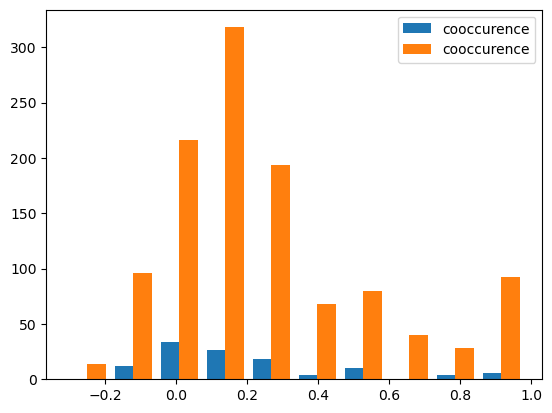

In [ ]:
plt.hist([list(no_dist.values()), list(co_dist.values())], 
    label= ['cooccurence', 'cooccurence'])
plt.legend()

[Text(0, 0, 'no cooccurrence'), Text(1, 0, 'cooccurrence')]

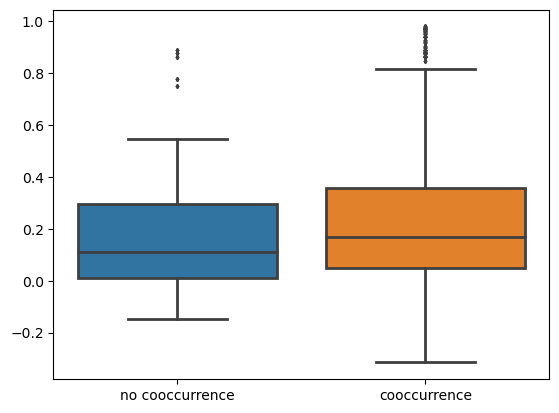

In [ ]:
ax = sns.boxplot([list(no_dist.values()), list(co_dist.values())], 
    linewidth=2, fliersize=2)
ax.set_xticklabels(labels=['no cooccurrence', 'cooccurrence'])

<AxesSubplot:>

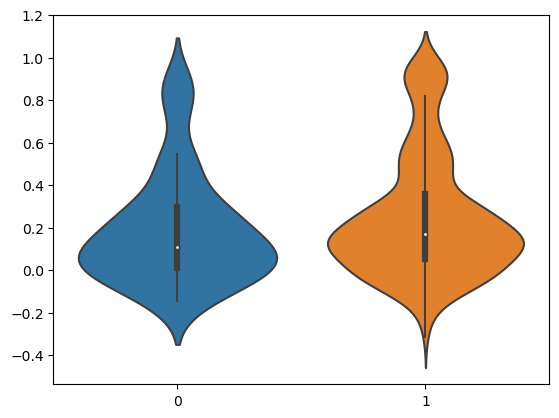

In [ ]:
sns.violinplot([list(no_dist.values()), list(co_dist.values())])

In [ ]:
ds_dir = "datasets/theos_recom/mouse_wb_pos"
slurm_dir = "slurm_job/theos_recom/mouse_wb_pos"

for f in os.listdir(ds_dir):
    f_path = os.path.join(ds_dir,f)
    try:
        ds_id = re.search('pixel_df_(.+?).pickle', f).group(1)
    except AttributeError:
        ds_id = '' # 
    
    df = pd.read_pickle(f_path)


In [ ]:
from pixel_dataframes import create_pixel_df

ds_dir = "datasets/theos_recom/mouse_wb_both"
slurm_dir = "slurm_job/theos_recom/No1No2"
parents = [ds_dir, slurm_dir]
for parent in parents:
    for f in os.listdir(parent):
        f_path = os.path.join(parent,f)
        df = pd.read_pickle(f_path)
        try:
            ds_id = re.search('pixel_df_(.+?).pickle', f).group(1)
        except AttributeError:
            ds_id = '' # 
        ds = sm.dataset(id=ds_id)
        annoframe = ds.results(fdr=0.1) # load annotations   
        off_ions = annoframe[annoframe.offSample == True].ion.tolist()
        print("#ions, pre off sample filtering: ", len(df.columns))
        df = df.drop(columns=off_ions)
        print("#ions, post off sample filtering: ", len(df.columns))
        df.to_pickle(f_path) # writing the filtered df

#ions, pre off sample filtering:  35



KeyboardInterrupt

